In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import median,mean,stdev
from scipy.stats import kurtosis, skew
from math import sqrt, ceil
np.seterr(under='ignore')
np.seterr(over='ignore')

from fitter import Fitter

%run ../funtion/Funciones.ipynb
%run ../funtion/powerlaw_psd_gaussian.ipynb

# Exercicio 4
# Espaço de Cullen-Frey e Distribuições de Probabilidades

# Ruidos Pregunta 1

In [2]:
serie_128 = np.zeros([128,1])
for i in range(128):
    serie_128 = np.array(pd.DataFrame(np.random.randn(i) * np.sqrt(128/12) * np.sqrt(1 / 128)).cumsum())

serie_8192 = np.zeros([8192,10])
for i in range(8192):
    serie_8192 = np.array(pd.DataFrame(np.random.randn(i) * np.sqrt(8192/12) * np.sqrt(1 / 8192)).cumsum())

serie_128_norm,serie_128_esta = Normalizar2(serie_128)
serie_8192_norm,serie_8192_esta = Normalizar2(serie_8192)

serie_128_list = list(serie_128_norm) 
serie_8192_list = list(serie_8192_norm) 

# Ruidos Pregunta 2

In [3]:
white_noise = np.zeros([8192])
pink_noise = np.zeros([8192])
red_noise = np.zeros([8192])

white_noise = powerlaw_psd_gaussian(0,8192)
pink_noise = powerlaw_psd_gaussian(1,8192)
red_noise = powerlaw_psd_gaussian(2,8192)
    
white_norm,white_esta = Normalizar2(white_noise)
pink_norm,pink_esta = Normalizar2(pink_noise)
red_norm,red_esta = Normalizar2(red_noise)

white_norm_list = list(white_norm)
pink_norm_list = list(pink_norm)
red_norm_list = list(red_norm)

# Ruidos Pregunta 3

In [4]:
x1,Endogenous = pmodel (8192,0.35,0.4)
x2,Exogenous = pmodel (8192,0.28,0.7)

Endogenous_norm,Endogenous_esta = Normalizar2(Endogenous)
Exogenous_norm,Exogenous_esta = Normalizar2(Exogenous)

Endogenous_list = list(Endogenous_norm)
Exogenous_list = list(Exogenous_norm)

# Resultados

## Ruidos de 2 Sinais Estocásticos
## 128 y 8192 elementos

<Figure size 4400x4000 with 0 Axes>

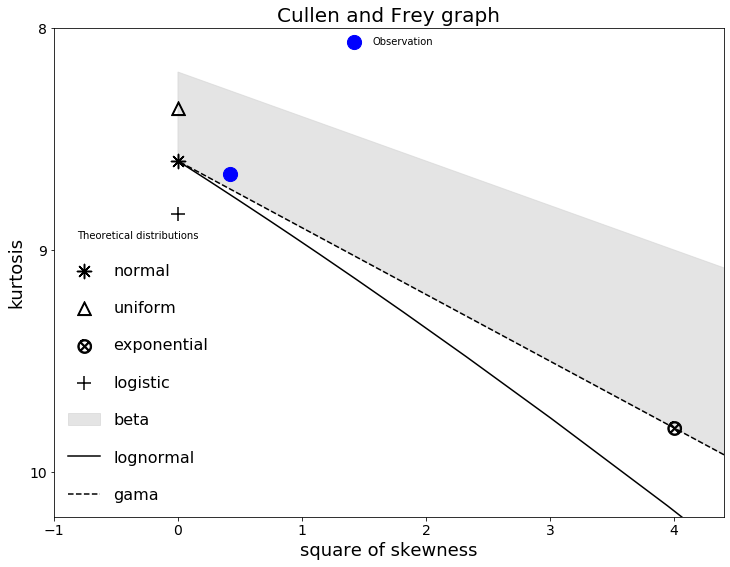

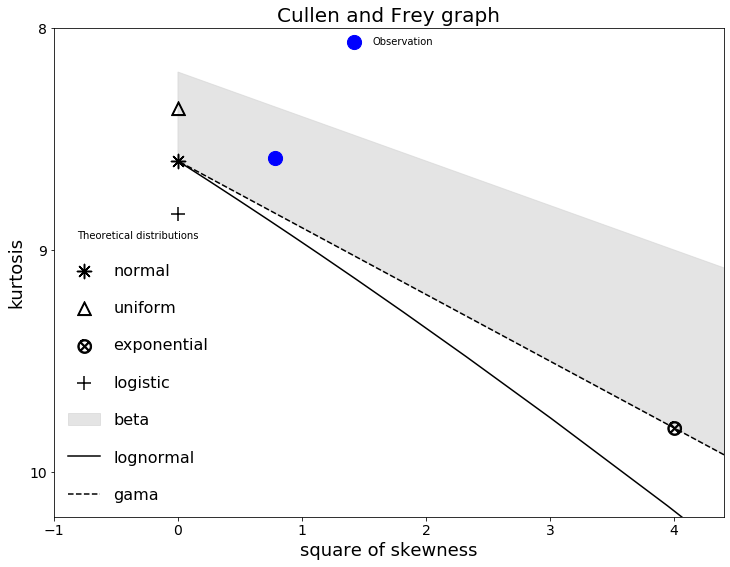

In [5]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(serie_128_list)
cullen_frey(serie_8192_list)

### De acordo com o diagrama de Cullen e Frey, ambas distribuiçoes de ruído pm são encontradas dentro da area de uma distribuição do tipo beta.

## White, Pink and Red Noise
## 8192 elementos

<Figure size 4400x4000 with 0 Axes>

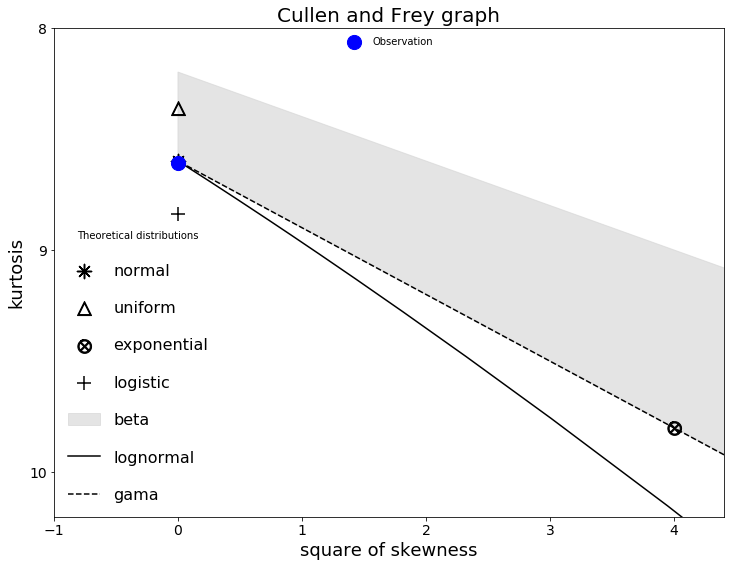

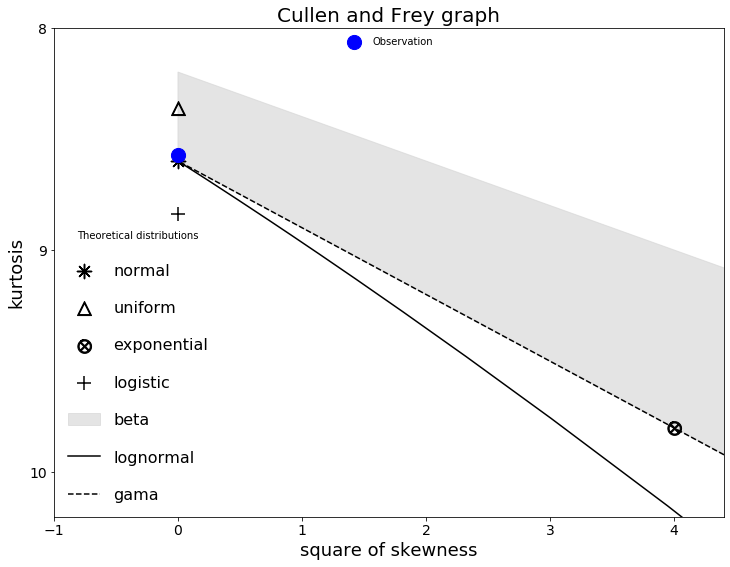

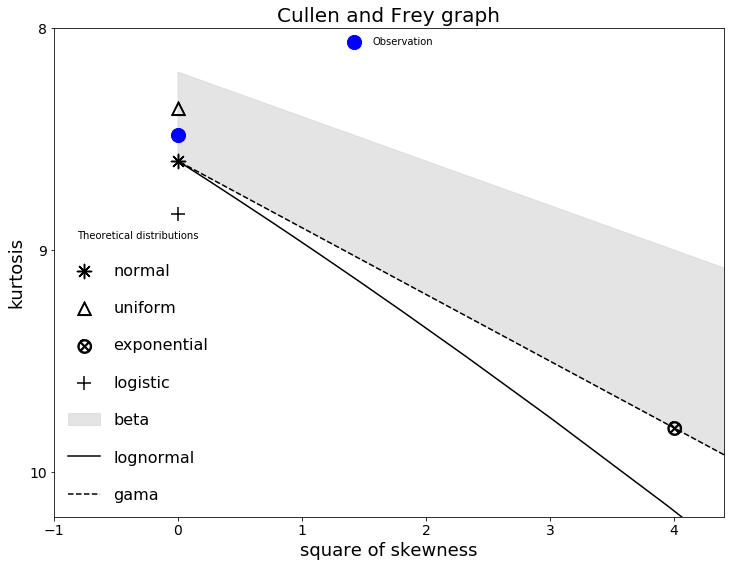

In [6]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(white_norm_list)
cullen_frey(pink_norm_list)
cullen_frey(red_norm_list)

### Os ruídos de cores têm uma distribuição normal

### Endogenous and Exogenous
### 8192 elementos

<Figure size 4400x4000 with 0 Axes>

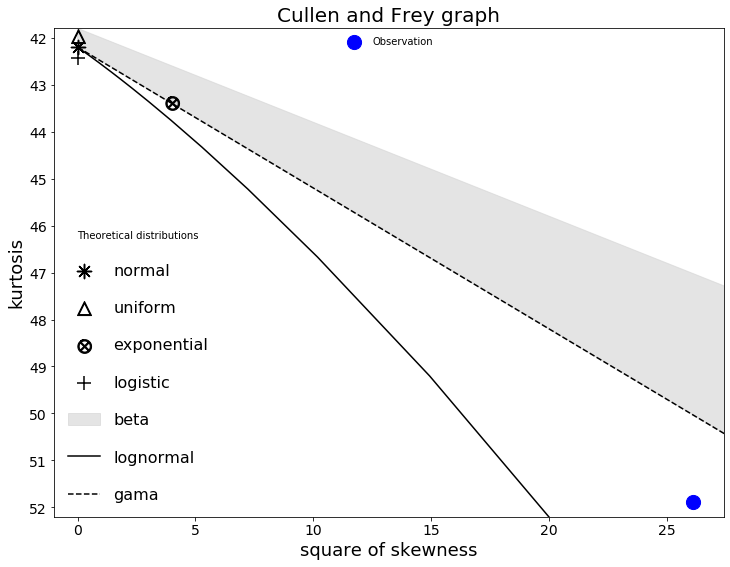

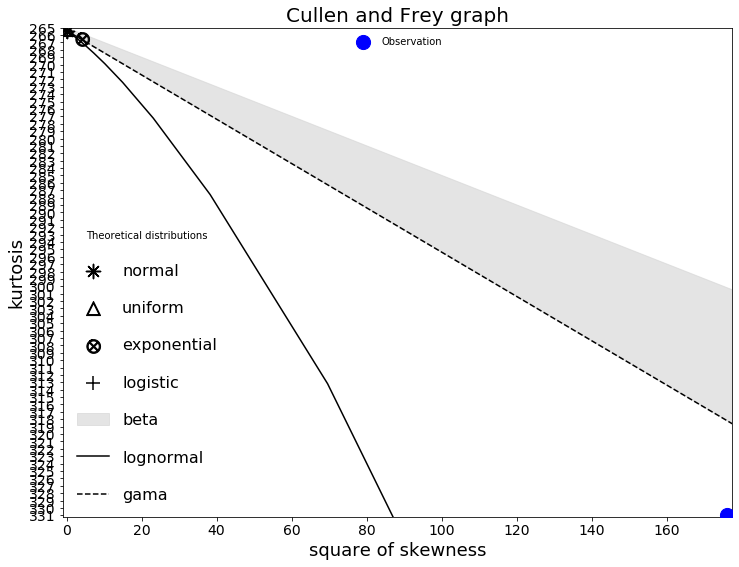

In [7]:
fig1 = plt.figure(figsize=(22,20),dpi=200)
cullen_frey(Endogenous_list)
cullen_frey(Exogenous_list)

### As séries endógenas e exógenas mostram uma distribuição entre as áreas log-normal e gama.

# Mostrando histogramas

## Pm Noise

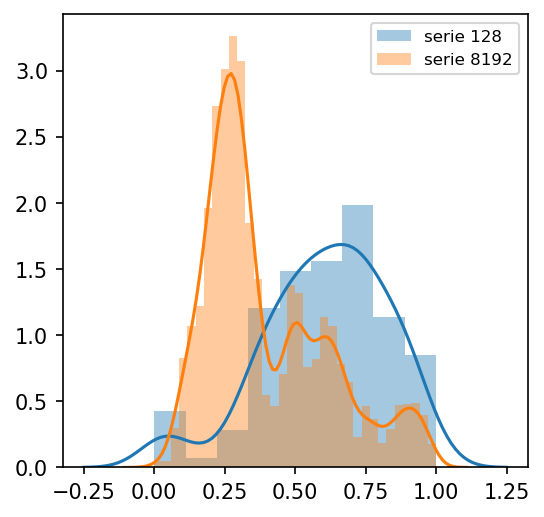

In [8]:
fig1 = plt.figure(figsize=(4,4),dpi=150)
sns.distplot(serie_128_norm,label='serie 128')
sns.distplot(serie_8192_norm,label='serie 8192')
plt.legend(fontsize=8)

## Color Noise

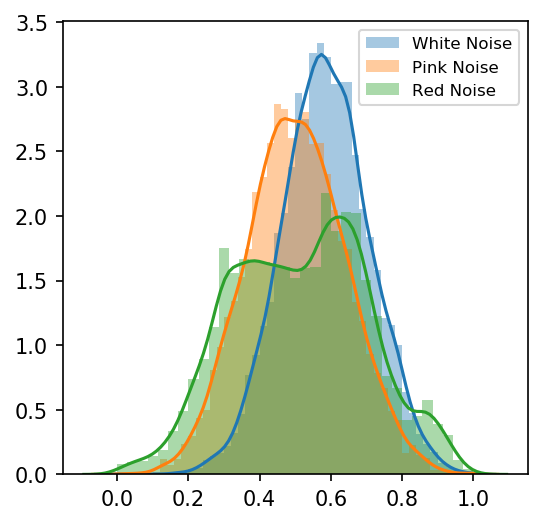

In [9]:
fig1 = plt.figure(figsize=(4,4),dpi=150)
sns.distplot(white_norm,label='White Noise')
sns.distplot(pink_norm,label='Pink Noise')
sns.distplot(red_norm,label='Red Noise')
plt.legend(fontsize=8)

## Endogeno e Exogeno

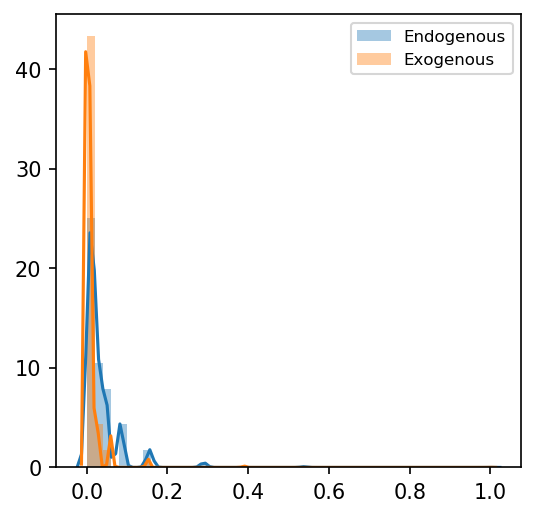

In [10]:
fig1 = plt.figure(figsize=(4,4),dpi=150)
sns.distplot(Endogenous_norm,label='Endogenous')
sns.distplot(Exogenous_norm,label='Exogenous')
plt.legend(fontsize=8)

In [11]:
f = Fitter(serie_128_norm)
f.fit()

/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:422: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))


Fitted alpha distribution with error=62.501899329699484)
Fitted anglit distribution with error=73.55442351273224)
Fitted arcsine distribution with error=127.06213312273478)
Fitted argus distribution with error=64.60815789677736)
Fitted beta distribution with error=59.0323911055588)


/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:708: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:712: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1063: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


Fitted betaprime distribution with error=60.31238504737639)
Fitted bradford distribution with error=93.01109257027308)
Fitted burr distribution with error=63.8234246948788)
Fitted burr12 distribution with error=59.707129466340405)
Fitted cauchy distribution with error=71.84104051438119)
Fitted chi distribution with error=60.67764165038635)
Fitted chi2 distribution with error=61.55954770085454)
Fitted cosine distribution with error=66.22779853731261)
Fitted crystalball distribution with error=60.37223676419319)
Fitted dgamma distribution with error=62.377256022091295)
Fitted dweibull distribution with error=62.89694831196464)


/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 9.450000000000001.
  warnings.warn(
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 8.549999999999999.
  warnings.warn(
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 8.099999999999998.
  warnings.warn(
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 8.399999999999999.
  warnings.warn(
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scip

/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 158.60597588526292.
  warnings.warn(
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 160.2491501506662.
  warnings.warn(
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 161.2465164385134.
  warnings.warn(
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2844: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 164.34485344035573.
  warnings.warn(
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/sc

Fitted erlang distribution with error=61.514841687995705)
Fitted expon distribution with error=140.5375309781939)
Fitted exponnorm distribution with error=60.37566278719805)
Fitted exponpow distribution with error=59.85392577986711)
Fitted exponweib distribution with error=60.26178728400027)
Fitted f distribution with error=165.6912361713054)
Fitted fatiguelife distribution with error=60.569962545991494)
Fitted fisk distribution with error=60.93394586658089)
Fitted foldcauchy distribution with error=69.45454819533732)
Fitted foldnorm distribution with error=60.24947969687835)
Fitted frechet_l distribution with error=58.642819452230846)
Fitted frechet_r distribution with error=59.691753280373966)
Fitted gamma distribution with error=61.21370778847052)
Fitted gausshyper distribution with error=59.63212955242438)
Fitted genexpon distribution with error=97.34581406649791)
Fitted genextreme distribution with error=58.64334069492748)
Fitted gengamma distribution with error=59.23053027111553)

/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3558: RuntimeWarning: Infinite values encountered in scipy.special.kve(p, b). Values replaced by NaN to avoid incorrect results.
  warnings.warn(msg, RuntimeWarning)
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2432: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


SKIPPED geninvgauss distribution (taking more than 30 seconds)
Fitted genlogistic distribution with error=61.92178612703862)
Fitted gennorm distribution with error=60.430703833546396)
Fitted genpareto distribution with error=95.98615773135123)
Fitted gilbrat distribution with error=126.92897951622922)
Fitted gompertz distribution with error=59.57461233580327)
Fitted gumbel_l distribution with error=60.862232446640064)
Fitted gumbel_r distribution with error=73.36590143975279)
Fitted halfcauchy distribution with error=133.05345629256368)
Fitted halfgennorm distribution with error=111.26604226792445)
Fitted halflogistic distribution with error=122.96545593060469)
Fitted halfnorm distribution with error=119.80267054584368)
Fitted hypsecant distribution with error=62.612195389075666)
Fitted invgamma distribution with error=62.1638802985749)
Fitted invgauss distribution with error=63.825935912632666)
Fitted invweibull distribution with error=73.36519624201813)
Fitted johnsonsb distribution 

/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:97: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)


Fitted kstwobign distribution with error=80.97590559747883)
Fitted laplace distribution with error=70.10654561097947)
Fitted levy distribution with error=146.94629492010247)
Fitted levy_l distribution with error=108.88972013248953)
SKIPPED levy_stable distribution (taking more than 30 seconds)
Fitted loggamma distribution with error=59.82590214099828)
Fitted logistic distribution with error=60.939257056064335)


/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


Fitted loglaplace distribution with error=70.42129115307291)
Fitted lognorm distribution with error=60.431960343467445)
Fitted loguniform distribution with error=298.8313245435603)
Fitted lomax distribution with error=140.50377815561714)
Fitted maxwell distribution with error=73.10175431243873)
Fitted mielke distribution with error=62.361086642276)
Fitted moyal distribution with error=82.42623802264431)
Fitted nakagami distribution with error=60.62804776193883)


/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5544: RuntimeWarning: overflow encountered in double_scalars
  return 2*nu**nu/sc.gamma(nu)*(x**(2*nu-1.0))*np.exp(-nu*x*x)


Fitted ncf distribution with error=142.16678585816888)


/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5830: RuntimeWarning: overflow encountered in exp
  Px = np.exp(trm1)
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5836: RuntimeWarning: invalid value encountered in multiply
  Px *= trm1+trm2
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5833: RuntimeWarning: overflow encountered in multiply
  trm1 /= np.asarray(fac1*sc.gamma((n+1)/2))
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5835: RuntimeWarning: overflow encountered in multiply
  trm2 /= np.asarray(np.sqrt(fac1)*sc.gamma(n/2+1))


Fitted nct distribution with error=60.35287047726278)
Fitted ncx2 distribution with error=107.0270783277052)
Fitted norm distribution with error=60.372237343459155)


/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3857: RuntimeWarning: overflow encountered in exp
  fac1 = a / np.pi * np.exp(gamma)
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3857: RuntimeWarning: overflow encountered in double_scalars
  fac1 = a / np.pi * np.exp(gamma)


Fitted norminvgauss distribution with error=60.92183366445929)
Fitted pareto distribution with error=148.7224349609861)
Fitted pearson3 distribution with error=59.6750890127885)
Fitted powerlaw distribution with error=77.83582773613495)
Fitted powerlognorm distribution with error=59.417413795593774)
Fitted powernorm distribution with error=59.78497261558361)
Fitted rayleigh distribution with error=84.69776594604186)
Fitted rdist distribution with error=93.91963304930914)
Fitted recipinvgauss distribution with error=61.05816743150353)
Fitted reciprocal distribution with error=298.8313245435603)
Fitted rice distribution with error=60.37224260948768)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitted semicircular distribution with error=81.60581160124649)
Fitted skewnorm distribution with error=60.62295109683381)
Fitted t distribution with error=60.15922011520245)
Fitted trapz distribution with error=81.2

/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:7248: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


Fitted tukeylambda distribution with error=77.56290953713093)
Fitted uniform distribution with error=91.58038316076636)
Fitted vonmises distribution with error=7.415640094228173e+63)


/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2664: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


Fitted vonmises_line distribution with error=191.58038316076636)
Fitted wald distribution with error=125.01831309336275)
Fitted weibull_max distribution with error=58.642819452230846)
Fitted weibull_min distribution with error=59.691753280373966)
Fitted wrapcauchy distribution with error=nan)


/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/scipy/optimize/optimize.py:597: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


,sumsquare_error,aic,bic,kl_div
weibull_max,58.642819,64.663696,-83.603126,inf
frechet_l,58.642819,64.663696,-83.603126,inf
genextreme,58.643341,64.659954,-83.601997,inf
beta,59.032391,63.705568,-77.918052,inf
gengamma,59.230530,79.714770,-77.492497,inf


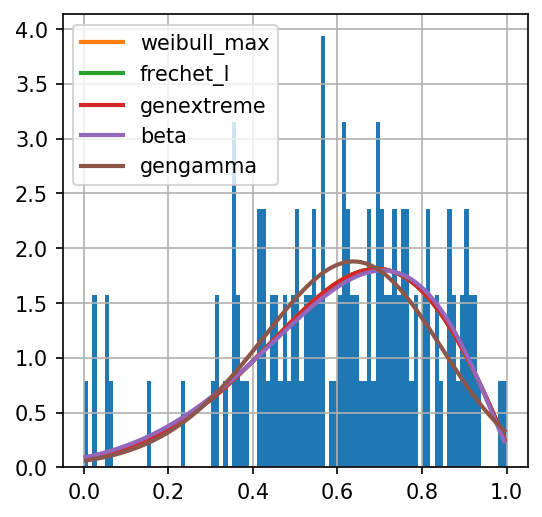

In [12]:
fig1 = plt.figure(figsize=(4,4),dpi=150)
f.summary()